# 01. EDA

### Importando os arquivos do projeto no Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importando as bibliotecas

In [2]:
import sys
import os
sys.path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

### Configurando para serem exibidas apenas mensagens de erro no Tensor Flow

In [3]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # Configurando para serem exibidas apenas mensagens de erro no Tensor Flow

### Lendo o dataset e visualizando um overview

In [4]:
df = keras.datasets.cifar10 # Armazenando o dataset em uma variável

In [5]:
(x_train, y_train), (x_test, y_test) = df.load_data() # Armazenando os dados do df já divididos em X e Y de treino e teste

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [6]:
x_train.shape # Verificando a quantidade de imagens, pixels na horizontal, pixels na vertical e canais de cores (RGB - Red Green Blue)

(50000, 32, 32, 3)

In [7]:
y_train.shape # Verificando a quantidade de imagens de y de treino

(50000, 1)

In [8]:
y_test.shape # Verificando a quantidade de imagens de y de teste

(10000, 1)

In [9]:
y_train[:5] # Exibindo os 5 primeiros valores de y de treino (o y de treino contém somente as respostas finais com a identificação da classe)

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

### Verificando o balanceamento do dataset

In [10]:
np.unique(y_train) # Verificando se realmente existem 10 classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [11]:
np.unique(y_train, return_counts=True) # Verificando a distribuição de valores entre as classes

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

In [12]:
contagem = tuple(zip(*np.unique(y_train, return_counts=True))) # Criando tuplas com o unpacking dos arrays, através do zip

for tupla in contagem: # Criando uma estrutura de repetição para calcular a porcentagem de cada número no conjunto y de treino
    print(f'{tupla[0]}: {tupla[1] / len(y_train) * 100:.2f}%')

0: 10.00%
1: 10.00%
2: 10.00%
3: 10.00%
4: 10.00%
5: 10.00%
6: 10.00%
7: 10.00%
8: 10.00%
9: 10.00%


In [13]:
class_names = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck',
] # Definindo uma legenda para as classes

Após a análise, é verificado que o dataset está balanceado e não é necessário aplicar nenhum tratamento para datasets desbalanceados.

### Visualizando as imagens e seus respectivos valores de y

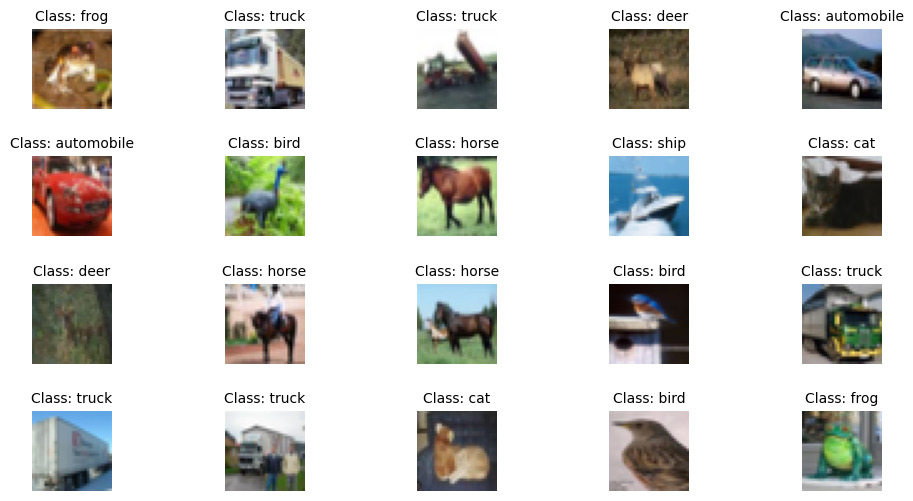

In [14]:
fig, axs = plt.subplots(figsize=(12,6), nrows=4, ncols=5) # Definindo o tamanho da figura para exibir os gráficos

for i, ax in enumerate(axs.flat): # Criando uma estrutura de repetição para percorrer cada valor de x e plotar em um gráfico
    ax.imshow(x_train[i]) # Plotando a imagem em um gráfico
    ax.set_title(f'Class: {class_names[y_train[i][0]]}', size=10) # Definindo o título do gráfico
    ax.axis('off') # Desativando os títulos dos eixos

fig.subplots_adjust(hspace=0.6) # Ajustando o espaço entre cada subfigura

plt.show() # Exibindo os gráficos